In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [10]:
df = df.iloc[:,1:]

In [11]:
df.head()

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0.000000,4.108757,5.841922e-01,-2.698173,-1.517376,9.999995e-07,0.5,2.0,5.0,4.0,2.0,0.0
1,0.000000,4.137121,5.841922e-01,-0.651148,-0.895270,9.999995e-07,0.5,2.0,0.0,1.0,2.0,0.0
2,0.040003,4.105562,9.999992e-07,0.000000,-0.895270,9.999995e-07,0.5,2.0,3.0,3.0,2.0,0.0
3,0.000000,4.101095,5.841922e-01,-1.034121,-0.835088,6.461468e+00,0.5,1.0,6.0,4.0,0.0,0.0
4,0.000000,4.147665,5.841922e-01,-2.915540,-0.026262,9.999995e-07,0.5,2.0,3.0,2.0,1.0,0.0


In [12]:
df['Label-0/1'].value_counts()

0.0    414130
1.0    414130
Name: Label-0/1, dtype: int64

<AxesSubplot:>

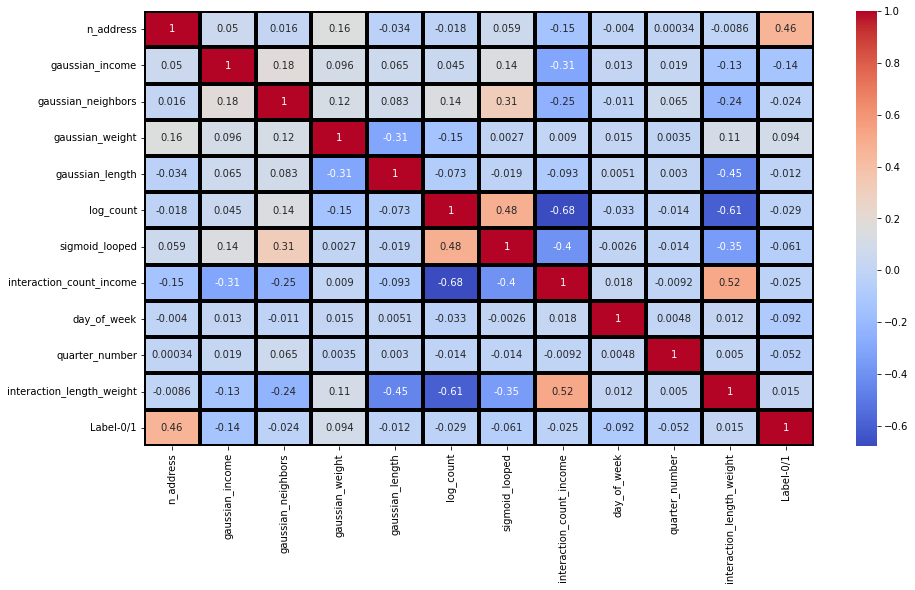

In [13]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=4, linecolor='black')

In [14]:
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)

In [15]:
distortions=[]
for i in range (1,5):
    km=KMeans(n_clusters=i,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

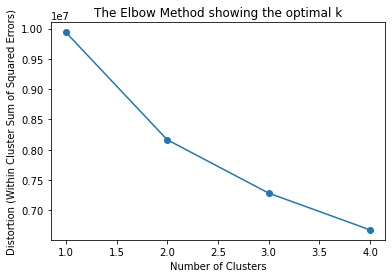

In [16]:
plt.plot(range(1,5),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

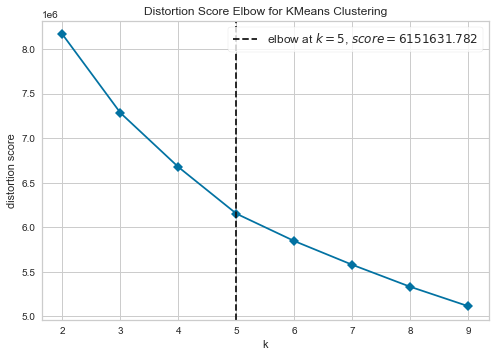

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer
visulaizer=KElbowVisualizer(kmeans, k=(2,10), timings=False)
visulaizer.fit(df_scaled)
visulaizer.show()

In [17]:
n= 2
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs 
kmeans = kmeans.fit(df_scaled)

In [18]:
labels=kmeans.labels_

In [19]:
! pip install yellowbrick
#!pip uninstall scikit-learn -y
!pip3 install scikit-learn

In [28]:
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:11])
df_scaled['Clusters']=labels 


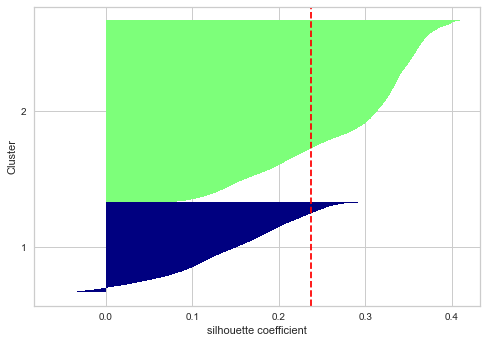

In [31]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [32]:
df_scaled.groupby(by='Clusters').count()

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight
Clusters,,,,,,,,,,,
0,274018,274018,274018,274018,274018,274018,274018,274018,274018,274018,274018
1,554242,554242,554242,554242,554242,554242,554242,554242,554242,554242,554242


Clusters-5

In [ ]:
n= 5
# Initializing KMeans
kmeans_5 = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs 
kmeans_5 = kmeans_5.fit(df_scaled)

In [ ]:
labels_5=kmeans_5.labels_

In [ ]:
df_scaled['Clusters_5']=labels_5
df_scaled_1 = df_scaled.drop(['Clusters'] , axis = 1)

In [ ]:
cluster_labels=np.unique(labels_5)
n_clusters=cluster_labels_5.shape[0]
silhouette_vals=silhouette_samples(df_scaled_1,labels_5,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()